# Simulating M/D/1 queues

In [18]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

SAMPLE_SIZE = 1000
ARRIVAL_RATE = 1
EXECUTION_RATE = 1

## An example arrival time distribution

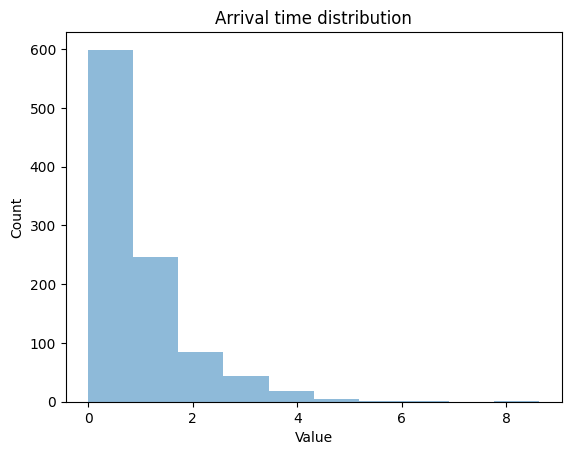

Mean arrival time: 0.9404003166955386
[1.07404999 0.25039518 0.83443579 2.00878045 0.16027169 0.27435256
 0.10715382 0.2258788  1.44177935 0.88514439]


In [19]:
inter_arrival_time = np.random.exponential(scale=1,size=SAMPLE_SIZE)

plt.title("Arrival time distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(inter_arrival_time, alpha=0.5)
plt.show()

print(f'Mean arrival time: {inter_arrival_time.mean()}')
print(inter_arrival_time[:10])

## Queue length over time

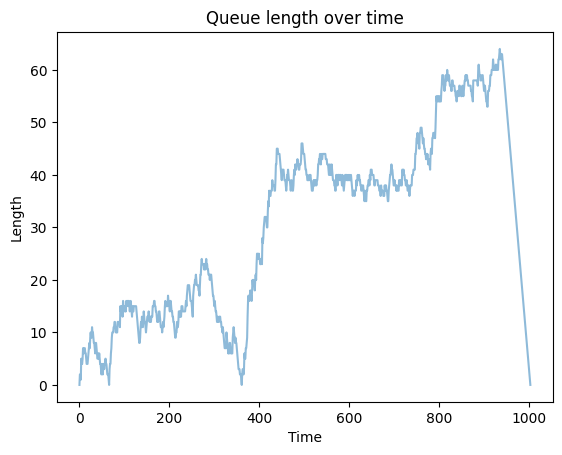

Mean queue length: 30.73804780876494


In [20]:
from src.queue import Queue

queue = Queue(inter_arrival_time, np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=EXECUTION_RATE))
queue.process()

plt.title("Queue length over time")
plt.xlabel("Time")
plt.ylabel("Length")
plt.plot(queue.length.tolist(), alpha=0.5)
plt.show()

print(f'Mean queue length: {queue.length.mean()}')


## Departure time and distribution

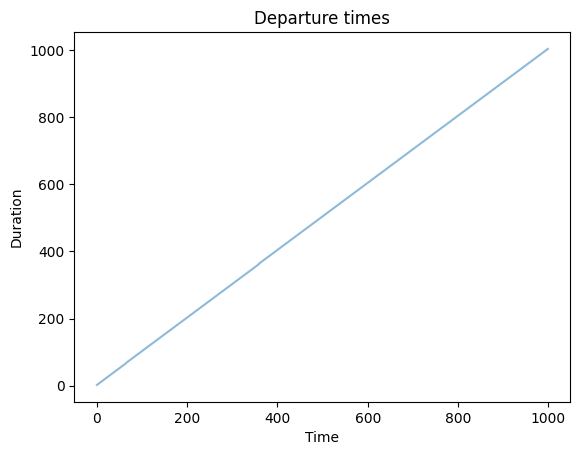

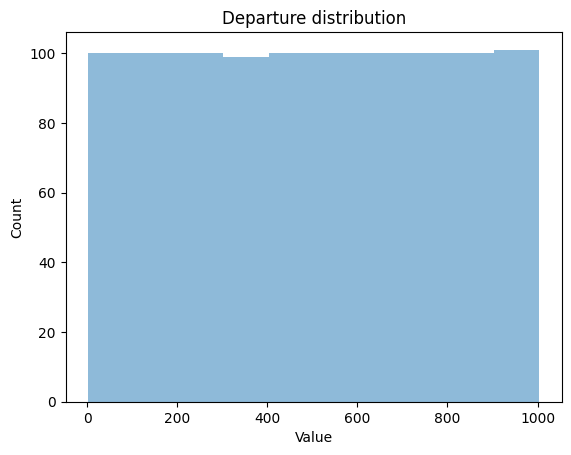

In [21]:
plt.title("Departure times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.departure_times, alpha=0.5)
plt.show()

plt.title("Departure distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.departure_times, alpha=0.5)
plt.show()

## Wait time and distribution

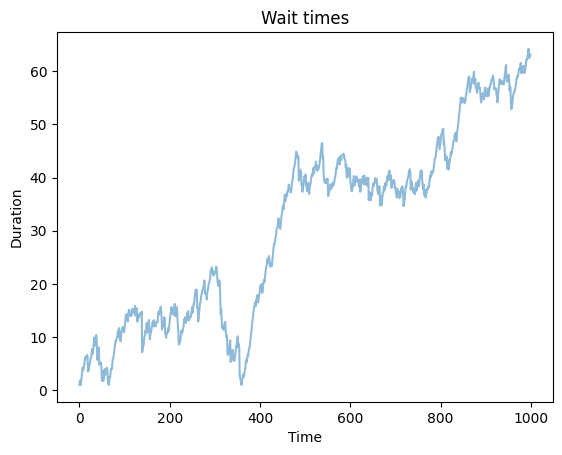

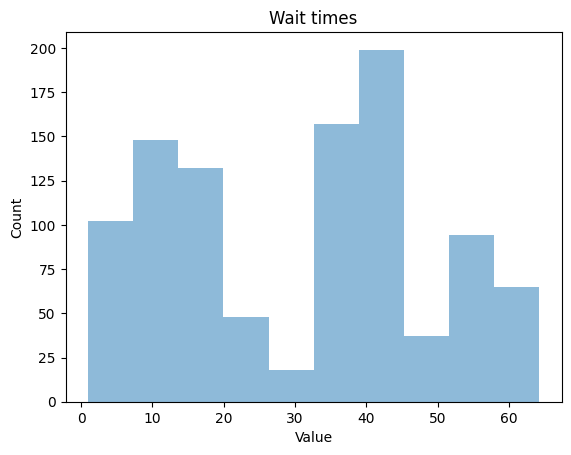

In [22]:
plt.title("Wait times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.wait_times, alpha=0.5)
plt.show()

plt.title("Wait times")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.wait_times, alpha=0.5)
plt.show()